# Kaggle talking data challenge

### Prepare Everything for downloading the data

I use a project called **dat** that allows you to do peer to peer downloads of file from the command line to share my credentials for the Kaggle API

In [0]:
!npm install -g dat

/tools/node/bin/dat -> /tools/node/lib/node_modules/dat/bin/cli.js

> fd-lock@1.0.2 install /tools/node/lib/node_modules/dat/node_modules/fd-lock
> node-gyp-build


> sodium-native@2.4.2 install /tools/node/lib/node_modules/dat/node_modules/sodium-native
> node-gyp-build "node preinstall.js" "node postinstall.js"


> utp-native@1.7.3 install /tools/node/lib/node_modules/dat/node_modules/discovery-swarm/node_modules/utp-native
> node-gyp-build


> utp-native@2.1.3 install /tools/node/lib/node_modules/dat/node_modules/utp-native
> node-gyp-build

+ dat@13.13.1
added 476 packages from 254 contributors in 17.713s


In [0]:
# Update dat
!npm i -g dat

/tools/node/bin/dat -> /tools/node/lib/node_modules/dat/bin/cli.js
+ dat@13.13.1
updated 1 package in 11.26s


In [0]:
# Connect to the local file containing my credentials
!dat clone dat://369100612990cfce60b3ad9811ab7427c02394392ffb6d6540e35751aa0be9b9

Connecting to dat network...dat v13.13.1
Created new dat in /content/369100612990cfce60b3ad9811ab7427c02394392ffb6d6540e35751aa0be9b9/.dat
Cloning: 1 files (64 B)

1 connection | Download 49 B/s Upload 0 B/s




Ctrl+C to Exit81dat sync complete.
Version 1

Exiting the Dat program...

In [0]:
# check the newly created folder
!ls

369100612990cfce60b3ad9811ab7427c02394392ffb6d6540e35751aa0be9b9  sample_data


In [0]:
# Create the appropriate directory and move the json file to the recently created folder
!mkdir ~/.kaggle
!mv 369100612990cfce60b3ad9811ab7427c02394392ffb6d6540e35751aa0be9b9/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!rm -r 369100612990cfce60b3ad9811ab7427c02394392ffb6d6540e35751aa0be9b9/

In [0]:
# Download the kaggle competition data
!kaggle competitions download -c talkingdata-adtracking-fraud-detection

100% 1.21G/1.21G [00:12<00:00, 90.6MB/s]
100% 1.21G/1.21G [00:12<00:00, 103MB/s] 
  0% 0.00/1.08M [00:00<?, ?B/s]
100% 1.08M/1.08M [00:00<00:00, 74.2MB/s]
 95% 156M/165M [00:03<00:00, 43.9MB/s]
100% 165M/165M [00:03<00:00, 54.5MB/s]
 63% 25.0M/39.8M [00:00<00:00, 86.0MB/s]
100% 39.8M/39.8M [00:00<00:00, 114MB/s] 
 97% 489M/504M [00:11<00:00, 103MB/s]
100% 504M/504M [00:11<00:00, 46.7MB/s]


In [0]:
# Inflate compressed training sample!!
!unzip train_sample.csv.zip

Archive:  train_sample.csv.zip
replace mnt/ssd/kaggle-talkingdata2/competition_files/train_sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mnt/ssd/kaggle-talkingdata2/competition_files/train_sample.csv  


## Start EDA with sample data



In [0]:
import pandas as pd
sample = pd.read_csv('mnt/ssd/kaggle-talkingdata2/competition_files/train_sample.csv',
                     parse_dates=['click_time', 'attributed_time'])

In [0]:
sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0


In [0]:
sample.dtypes

ip                       category
app                      category
device                   category
os                       category
channel                  category
click_time         datetime64[ns]
attributed_time    datetime64[ns]
is_attributed               int64
dtype: object

The first thing we can observe is that some of the features are encoded as numerical, however they are actually categorical variables such as ip, app, device, os and channel. So what we are going to do is to convert them to categorical variables so we can properly do the exploratory analysis on them.

In [0]:
#Convert ip, app, device, os, channel to categorical variables and extract day of week and hour as a feature

cat_data = ['ip', 'app', 'device', 'os', 'channel']

for column in cat_data:
  sample[column] = sample[column].astype("category")



In [0]:
sample.dtypes

ip                       category
app                      category
device                   category
os                       category
channel                  category
click_time         datetime64[ns]
attributed_time    datetime64[ns]
is_attributed               int64
dtype: object

After we have converted them to categorical we can start to doing some visualizations and explorations. First questions to cover:
1. How balanced is the data.
2. Are there any features that are more common to the non class vs the class?

In [0]:
# See how classes are distributed and visualize it

balance = sample.is_attributed.value_counts().reset_index().replace({'index':{0: 'non fraud', 1:'fraud'}})
balance

,index,is_attributed
0,non fraud,99773
1,fraud,227


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

As we can observe the classes for the training set are hugely imbalanced. To get an idea of how badly it is, we can take a look at the percentage of data tha we have for each class.

In [0]:
import numpy as np
balance['percentage'] = balance.is_attributed / balance.is_attributed.sum() * 100
balance

,index,is_attributed,percentage
0,non fraud,99773,99.773
1,fraud,227,0.227


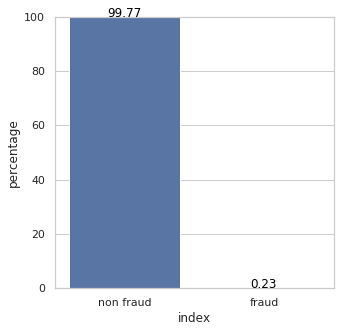

In [0]:
f, ax = plt.subplots(figsize=(5, 5))
ax.set(ylim=(0, 100))
g = sns.barplot('index', 'percentage', data=balance, ax=ax)
for index, row in balance.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage, 2), color='black', ha="center")
plt.show()


We can explore some descriptions of the data by class

In [0]:
sample.query('is_attributed == 0')[['ip', 'app', 'device', 'os', 'channel']].describe()

,ip,app,device,os,channel
count,99773,99773,99773,99773,99773
unique,34707,155,91,129,159
top,5348,3,1,19,280
freq,666,18275,94192,23829,8112


In [0]:
sample.query('is_attributed == 1')[['ip', 'app', 'device', 'os', 'channel']].describe()

,ip,app,device,os,channel
count,227,227,227,227,227
unique,223,37,25,39,40
top,5348,19,1,19,213
freq,3,70,146,41,72


In [0]:
#Inflate compressed training set
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: mnt/ssd/kaggle-talkingdata2/competition_files/train.csv  


In [0]:
import dask.dataframe as dd
df = dd.read_csv('mnt/ssd/kaggle-talkingdata2/competition_files/train.csv')

